<a href="https://colab.research.google.com/github/kategimranova/linear_algebra/blob/main/linear_algebra_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HomeWork №2. Variant 10. Gimranova Ekaterina

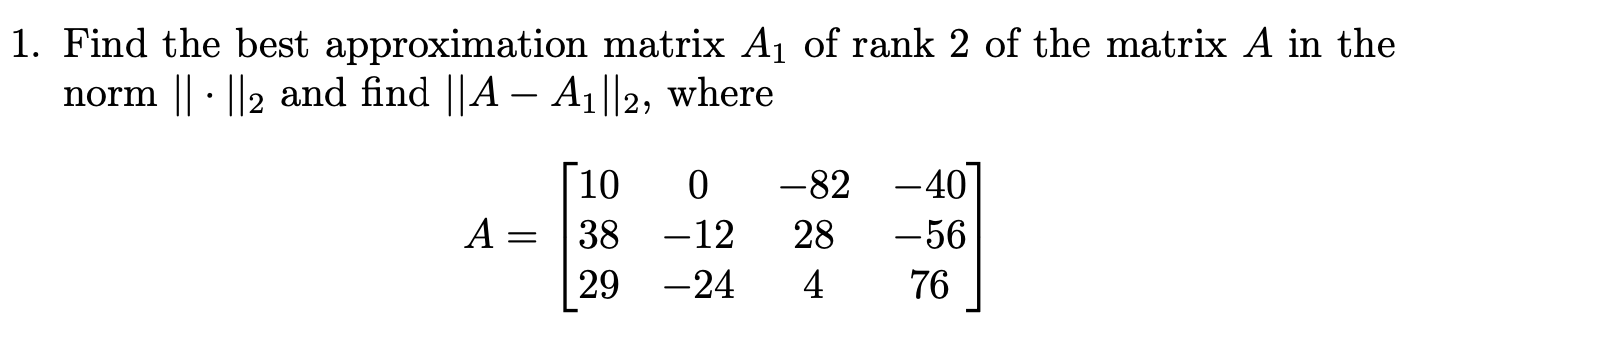


In [1]:
import numpy as np
from math import log,ceil,factorial

In [2]:
A = np.array([[10,0,-82, -40], 
             [38, -12, 28, -56],
             [29, -24, 4, 76]])

In [3]:
rank_A = np.linalg.matrix_rank(A)
print('Rank of matrix A is equal to {}'.format(rank_A))

Rank of matrix A is equal to 3


As we can see, $rg(A) = 3 \neq 2$ , that's why we can't use matrix A as approximation of rank 2

As we known, the best approximation matrix A of a given rank is equal to:

$A_1 \approx U {\Sigma_{(r)}}^0 V$,
where ${\Sigma_{(r)}}^0$ is a sigma-matrix, where all singular values of index $i>r$ are equal to 0.


Finding the SVD of matrix $A$:

In [4]:
U, Sigma, V = np.linalg.svd(A)

Getting the approximation matrix $A_1$

In [5]:
def get_approximate_of_matrix(A):
    U, Sigma, V = np.linalg.svd(A)
    print('Matrix U: \n {}'.format(U.round(2)))
    print('Matrix V: \n {}'.format(V.round(2)))
    print('Matrix Sigma: \n {}'.format(np.diag(Sigma)))


    #Making a sigma matrix of a correct shape for multiplying

    new_column = [[0], [0], [0]]
    reduced_sigma = np.append(np.diag(np.array([Sigma[0], Sigma[1], 0])),new_column, axis=1) #reduced by rang 2
    print("Reduced sigma: \n {}".format(reduced_sigma))

    approx_matrix = U @ reduced_sigma @ V

    return approx_matrix


In [6]:
A1 = get_approximate_of_matrix(A)

Matrix U: 
 [[ 0.67  0.67  0.33]
 [ 0.33 -0.67  0.67]
 [-0.67  0.33  0.67]]
Matrix V: 
 [[-0.    0.11 -0.44 -0.89]
 [-0.11 -0.   -0.89  0.44]
 [ 0.89 -0.44 -0.11  0.  ]
 [ 0.44  0.89  0.    0.11]]
Matrix Sigma: 
 [[108.   0.   0.]
 [  0.  81.   0.]
 [  0.   0.  54.]]
Reduced sigma: 
 [[108.   0.   0.   0.]
 [  0.  81.   0.   0.]
 [  0.   0.   0.   0.]]


In [7]:
print("Approximation matrix: \n {}".format(A1))

Approximation matrix: 
 [[ -6.   8. -80. -40.]
 [  6.   4.  32. -56.]
 [ -3.  -8.   8.  76.]]


Let's make sure that obtained approximation matrix has rang = 2.

In [8]:
rank_A1 = np.linalg.matrix_rank(A1)
print('Rank of matrix A1 is equal to {}'.format(rank_A1))

Rank of matrix A1 is equal to 2


Now we can find ${||A - A_1||}_2$:

Let's consider $\Delta A = A_1 - A$

It's a proven fact that  ${||\Delta A||}_2 = \overline{\sigma}(\Delta A) $, where $\overline{\sigma}(\Delta A) $ is the maximum singular value of $\Delta A$.

In [9]:
delta_A = (A - A1).round(2)
print(delta_A)

[[ 16.  -8.  -2.  -0.]
 [ 32. -16.  -4.  -0.]
 [ 32. -16.  -4.   0.]]


In [10]:
def get_spectral_norm_of_matrix(delta_A):
    U_delta, Sigma_delta, V_delta = np.linalg.svd(delta_A)
    print('Matrix Delta U: \n {}'.format(U_delta.round(2)))
    print('Matrix Delta V: \n {}'.format(V_delta.round(2)))
    print('Matrix Delta Sigma: \n {}'.format(np.diag(Sigma_delta).round(2)))

    spectral_norm = Sigma_delta[0]

    return spectral_norm


In [11]:
spectral_norm = get_spectral_norm_of_matrix(delta_A)

Matrix Delta U: 
 [[-0.33 -0.94  0.  ]
 [-0.67  0.24 -0.71]
 [-0.67  0.24  0.71]]
Matrix Delta V: 
 [[-0.89  0.44  0.11  0.  ]
 [-0.46 -0.86 -0.22  0.  ]
 [ 0.    0.24 -0.97  0.  ]
 [ 0.    0.    0.    1.  ]]
Matrix Delta Sigma: 
 [[54.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [12]:
print("Spectral norm of a delta matrix is equal to {}".format(round(spectral_norm,2)))

Spectral norm of a delta matrix is equal to 54.0


Thereby, spectral norm of a delta matrix = 54.

## **Answer**:
 
***best approximation matrix of a rang 2:***


In [13]:
print(A1)

[[ -6.   8. -80. -40.]
 [  6.   4.  32. -56.]
 [ -3.  -8.   8.  76.]]


### ${||A- A_1||}_2$ = 54

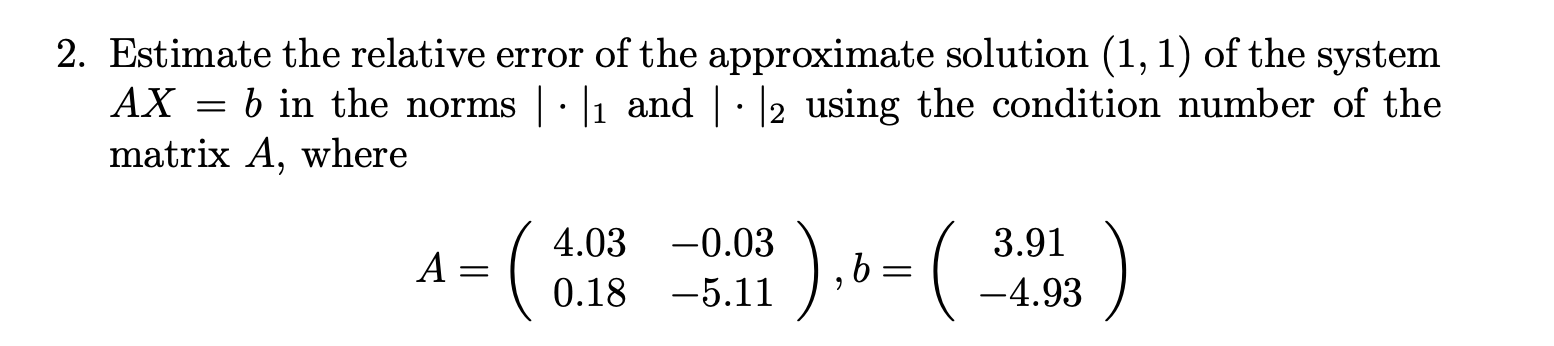

In [14]:
A = np.array([[4.03, -0.03], 
              [0.18, -5.11]])
b = np.array([[3.91], 
             [-4.93]])

Consider  $\delta X$ as *relative error* in $X$, $cond(A)$ as a condition number of matrix $A$

---


Thus, we can define the property of a condition number as
$\frac{1}{cond(A)} \delta b \leq \delta X \leq cond(A)\delta b$



Condider $b_1$ as approximate vector of $b$:

In [15]:
b1 = b.round() #it's one of the possible ways to approximate vector
print("b1 is equal to \n {}".format(b1))

b1 is equal to 
 [[ 4.]
 [-5.]]


**1) $l_1$ - norm case**

By the definition, $cond_1(A) = {||A_1||}_1  \cdot ||A^{-1}||_1$

In [16]:
condition_number1 = round(np.linalg.norm(A, 1) * np.linalg.norm(np.linalg.inv(A), 1),2)

In [17]:
condition_number1

1.32

In our case, $cond_1(A) = 1.32 $

By the definition, $\delta b = \frac{||\Delta b||_1}{{||b||}_1}$
where $\Delta b = b - b1$

In [18]:
b_error1 = round(np.linalg.norm(b - b1, 1) / np.linalg.norm(b, 1),2)
print("b error is equal to {}".format(b_error1))

b error is equal to 0.02


In [19]:
upper_bondary1 = round(condition_number1 * b_error1, 3)
upper_bondary1

0.026

In [20]:
lower_boundary1 = round(1/condition_number1 * b_error1, 3)
lower_boundary1

0.015

Thus, $0.015 \leq \delta X \leq 0.026$ or $\delta X \in [0.015,0.026]$

**2) $l_2$ - norm case**

The algorithm of finding boundaries is the same, but instead of $l_1$ we use $l_2$ - norm

$cond_2(A) = {||A_1||}_2  \cdot ||A^{-1}||_2$

In [21]:
condition_number2 = round(np.linalg.norm(A, 2) * np.linalg.norm(np.linalg.inv(A), 2),2)
condition_number2 

1.27

In our case, $cond_2(A) = 1.27 $

$\delta b = \frac{||\Delta b||_2}{{||b||}_2}$
where $\Delta b = b - b1$

In [22]:
b_error2 = round(np.linalg.norm(b - b1, 2) / np.linalg.norm(b, 2),2)
print("b error is equal to {}".format(b_error2))

b error is equal to 0.02


In [23]:
upper_bondary2 = round(condition_number2 * b_error2, 3)
upper_bondary2

0.025

In [24]:
lower_boundary2 = round(1/condition_number2 * b_error2, 3)
lower_boundary2

0.016

Thus, $0.016 \leq \delta X \leq 0.025$ or $\delta X \in [0.016,0.025]$

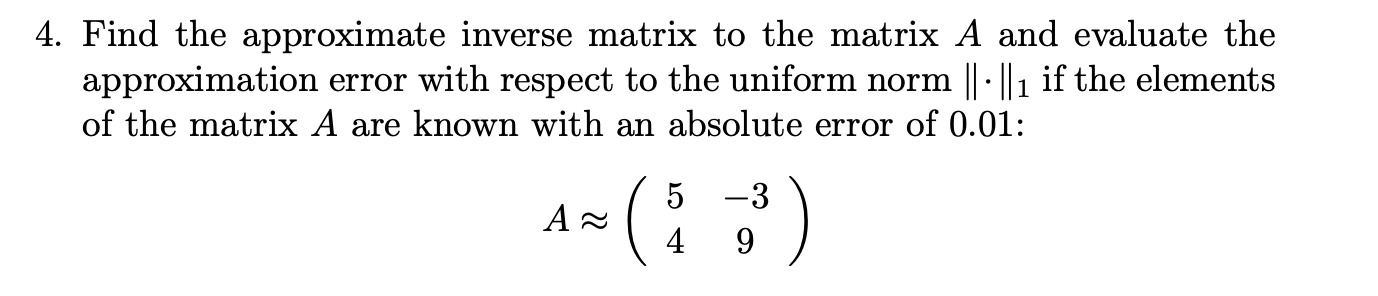

In [25]:
A = np.array([[5, -3], [4,9]])
A

array([[ 5, -3],
       [ 4,  9]])

In [26]:
absolute_error = np.full((2, 2), 0.01)#погрешность
absolute_error

array([[0.01, 0.01],
       [0.01, 0.01]])

Let's find the upper boundary of the relative error:

$\delta A^{-1}\leq cond(A) \frac{{\Vert \Delta \Vert}_1}{{\Vert A \Vert}_1}$

Inverse matrix:  $A^{-1}$

In [27]:
inverse_matrix = np.linalg.inv(A).round(2)
print("Inverse matrix is equal to \n {}".format(inverse_matrix))

Inverse matrix is equal to 
 [[ 0.16  0.05]
 [-0.07  0.09]]


Approximate error:

In [28]:
approx_error = round(np.linalg.norm(A, 1) * np.linalg.norm(inverse_matrix, 1) * (np.linalg.norm(absolute_error,1) / np.linalg.norm(A, 1)),3)
print("Approximate error = {}".format(approx_error))

Approximate error = 0.005


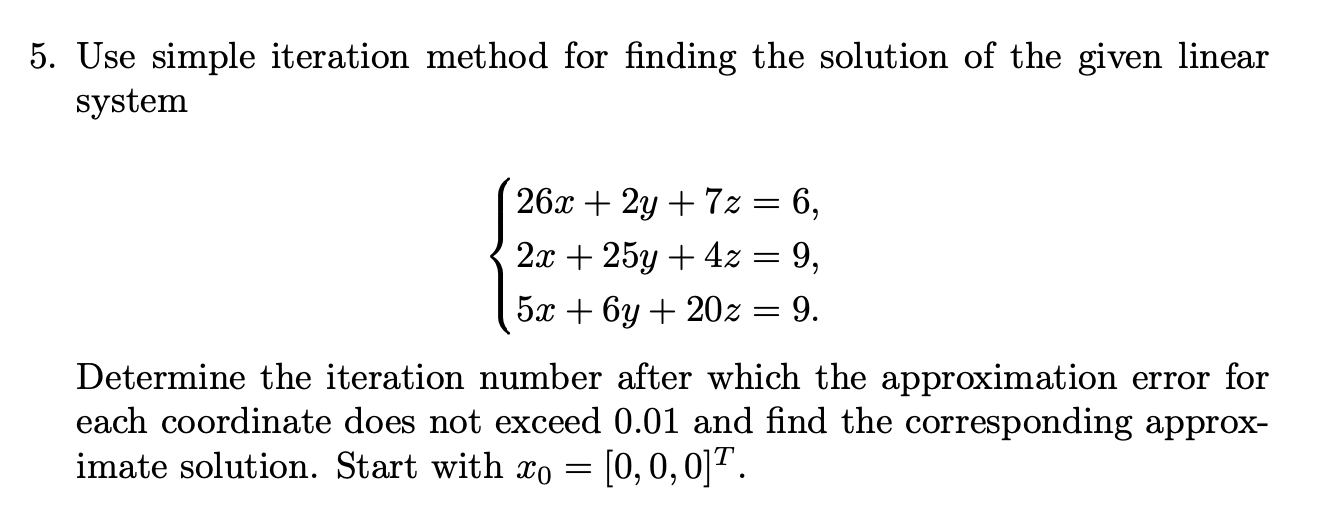

The main idea is to represent equations of the system as

$X_{k+1} = P X_{k} + b$


$$\begin{cases}
26x + 2y + 7z = 6 \\
2x + 25y + 4z = 9 \\
5x + 5y + 20z = 9
\end{cases} \Leftrightarrow 
\begin{cases}
x = \frac{6}{26} - \frac{2}{26}y - \frac{7}{26}z \\
y = \frac{9}{25} - \frac{4}{25}z - \frac{2}{25}x \\
z = \frac{9}{20} - \frac{5}{20}x - \frac{6}{20}y
\end{cases}$$

In our case, 

In [29]:
b = np.array([6/26, 9/25, 9/20])
print("b:")
print(b)

b:
[0.23076923 0.36       0.45      ]


In [30]:
P = np.array([[0, -2/26, -7/26], [-2/25, 0, -4/25], [-5/20, -6/20, 0]])
print("P:")
print(P)

P:
[[ 0.         -0.07692308 -0.26923077]
 [-0.08        0.         -0.16      ]
 [-0.25       -0.3         0.        ]]


If $l_1$-norm of matrix P will be less than 1, it will be mean that system converges to the solution. Let's check it:

In [31]:
l1_norm = round(np.linalg.norm(P, 1), 2)
print("l1 norm: {}".format(l1_norm))

l1 norm: 0.43


According to the theorem, the number($N$) of iterations for getting $\varepsilon$ is equal to:

$$ N = \log_{\Vert P \Vert}\left( \frac{\varepsilon(1 - {{\Vert P \Vert)}}_1}{{||B ||}_1} \right) - 1$$

where by the condition $\varepsilon = 0.01$

---
Let's find this number *N*:


In [32]:
normP1 = np.linalg.norm(P, 1)
normb1= np.linalg.norm(b, 1)
N = ceil(log((0.01 * (1 - normP1))/ normb1, normP1) - 1)

In [33]:
print("Number of iterations N is equal to {}".format(N))

Number of iterations N is equal to 6


*Iterations representation:*

In [34]:
!pip install prettytable #for beautiful representation of table

In [35]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Number of iteration', 'Current X']

In [36]:
X = np.array([0, 0, 0]) # start x0
for i in range(N):
    X = P@X + b
    table.add_row([i+1, X.round(3)])

In [37]:
print(table)

+---------------------+---------------------+
| Number of iteration |      Current X      |
+---------------------+---------------------+
|          1          | [0.231 0.36  0.45 ] |
|          2          | [0.082 0.27  0.284] |
|          3          | [0.133 0.308 0.349] |
|          4          | [0.113 0.294 0.324] |
|          5          | [0.121 0.299 0.334] |
|          6          | [0.118 0.297 0.33 ] |
+---------------------+---------------------+


***The solution is:***

In [38]:
print(X.round(3))

[0.118 0.297 0.33 ]


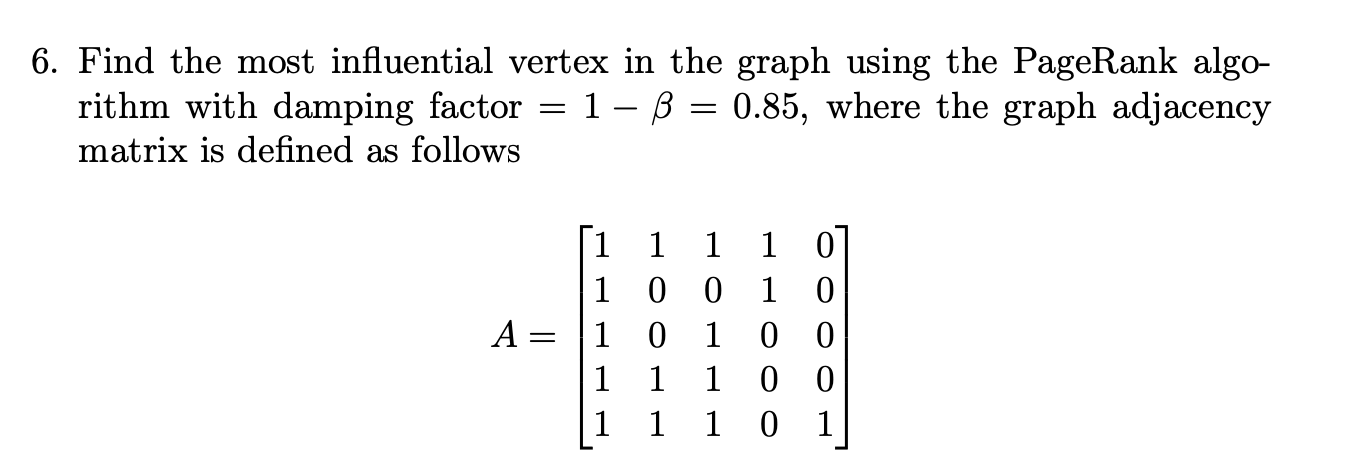

In [39]:
A = np.array([[1,1,1,1,0],
              [1,0,0,1,0],
              [1,0,1,0,0], 
              [1,1,1,0,0], 
              [1,1,1,0,1]])

Let's find the transition matrix $P$

In [40]:
P = np.array([A[0]/4, A[1]/2, A[2]/2, A[3]/3, A[4]/4]).T
print(P)

[[0.25       0.5        0.5        0.33333333 0.25      ]
 [0.25       0.         0.         0.33333333 0.25      ]
 [0.25       0.         0.5        0.33333333 0.25      ]
 [0.25       0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         0.25      ]]


We will find the solution in the form $X = MX$, where $M = (1 - \beta)P + \beta Q$

In [41]:
betta = 1 - 0.85 #by the condition

By the defenition, matrix $Q$ is equal to

In [42]:
dimA = A.shape[0]
dimA

5

In [43]:
Q = np.ones([dimA, dimA])/dimA
print("Q matrix:")
print(Q)

Q matrix:
[[0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]]


In [44]:
M = (1 - betta)*P + betta*Q
X = np.ones(dimA)/dimA
for i in range(8):
    X = M @ X
    print(X.round(2))

[0.34 0.17 0.26 0.16 0.07]
[0.34 0.16 0.27 0.18 0.05]
[0.35 0.16 0.28 0.17 0.04]
[0.35 0.16 0.28 0.17 0.04]
[0.35 0.16 0.28 0.17 0.04]
[0.35 0.16 0.28 0.17 0.04]
[0.35 0.16 0.28 0.17 0.04]
[0.35 0.16 0.28 0.17 0.04]


As the value 0.35 is maximum, the first vertix is the most influential.

***Answer: the first vertex***

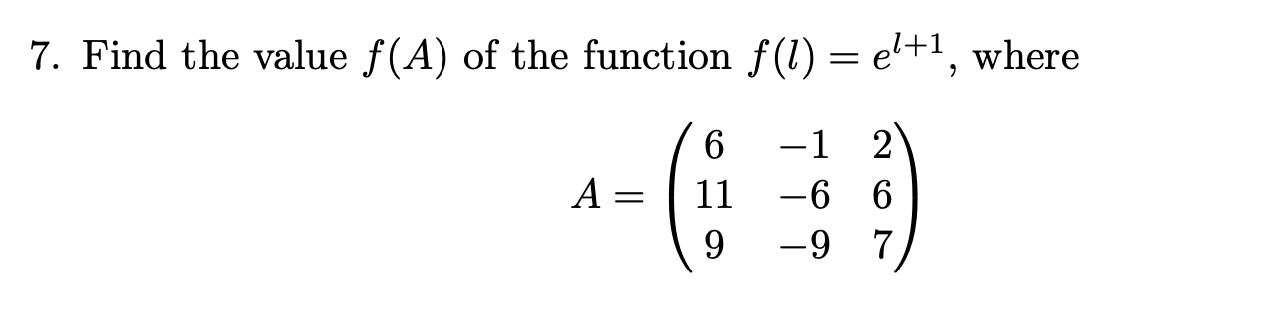

In [45]:
A = np.array([[6,-1,2],[11,-6,6], [9,-9,7]])

In [46]:
A_new = A + np.identity(3)
print("New matrix:")
print(A_new)

New matrix:
[[ 7. -1.  2.]
 [11. -5.  6.]
 [ 9. -9.  8.]]


The value $f(A)$:

In [47]:
term = lambda n: np.linalg.matrix_power(A, n)/float(factorial(n)) 
fA = sum([term(n) for n in range(40)])

In [48]:
print(fA)

[[ 285.95319089 -137.54003179  140.25831362]
 [ 299.54460003 -151.13144093  151.13144093]
 [  24.46453646  -24.46453646   19.0279728 ]]
